In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("./data./diabetes.csv")
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#.info를 통해 데이터 타입, 결측치, 메모리 사용량 확인.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df_null = df.isnull()
df_null.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [6]:
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# .describe() 수치데이터에 대한 요약값
df.describe()
# 표를 보면 클루코스 , 혈압, 피부주름두꼐 ,BMI는 0일수 없는데 0이다.
# 따라서 결측치일 가능성이 높다.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [10]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [12]:
#df[cols]가 0인것을 null값으로 처리한다.
#다시 결측지를 확인한다.
df_null = df[cols].replace(0,np.nan)
df_null = df_null.isnull()
df_null.sum()
#분류 예측 모델을 만들었을때 인슐린 수치가 당뇨뱡을 예측하는데 크게 도음이 되지 않았다.
# 인슐린 수치의 결측치가 많아서 그렇다고 예상할 수 있다.

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

<AxesSubplot:>

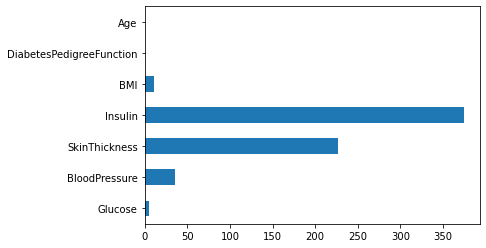

In [13]:
df_null.sum().plot.barh()

In [15]:
#df_null의 값들이 true, false값이기 때문에
#.mean()을 사용하면 퍼센트 값이 나온다.
df_null.mean()*100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<AxesSubplot:>

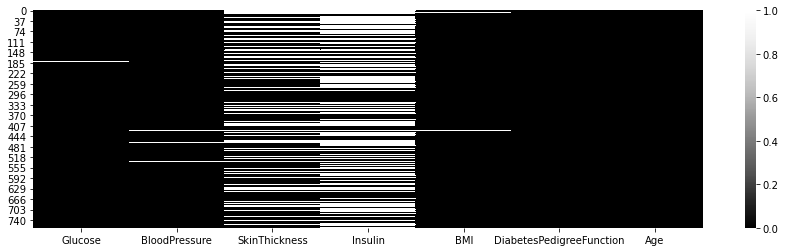

In [16]:
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap="Greys_r")

### 훈련과 예측에 사용할 정답값을 시각화로 보기

In [17]:
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [18]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [20]:
#비율로 나타내기
df['Outcome'].value_counts(normalize = True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [22]:
#임신과 당뇨병의 관계를 알아보기 위해
df.groupby(["Pregnancies"])['Outcome'].mean()

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

In [23]:
#연산이 두개 이상 사용될 때
df.groupby(['Pregnancies'])['Outcome'].agg(["mean","count"])

,mean,count
Pregnancies,,
0,0.342342,111
1,0.214815,135
2,0.184466,103
3,0.360000,75
4,0.338235,68
5,0.368421,57
6,0.320000,50
7,0.555556,45
8,0.578947,38


In [29]:
# 임신한 횟수를 인덱스 말고 컬럼으로 변경한다.
df_po = df.groupby(['Pregnancies'])['Outcome'].agg(["mean","count"]).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<AxesSubplot:>

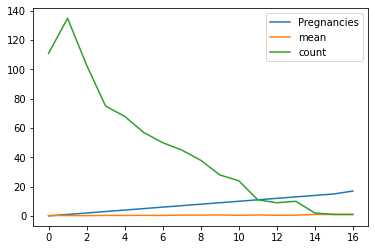

In [30]:
#시각화 그래프
df_po.plot()

<AxesSubplot:>

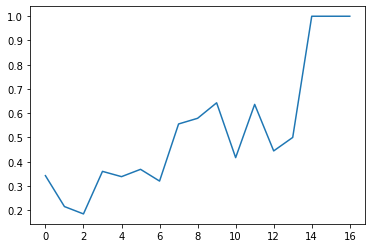

In [32]:
#mean값만 보기 위해서
df_po['mean'].plot()

<AxesSubplot:>

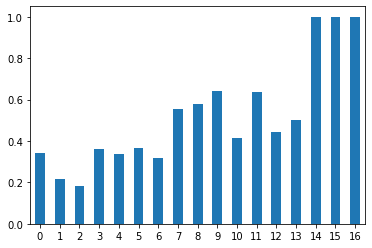

In [38]:
# 막대 그래프로 나타내기
# bar는 세로 막대기, rot= 0 은 숫자 제대로 쓰기
df_po["mean"].plot.bar(rot = 0)

### countplot을 이용해서 그래프로 나타내기

<AxesSubplot:xlabel='Outcome', ylabel='count'>

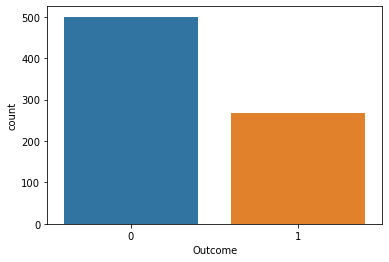

In [42]:
sns.countplot(data = df, x ="Outcome")
# 0이 더 많은 것을 보아 당뇨병에 걸리지 않는 경우가 더 많다.

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

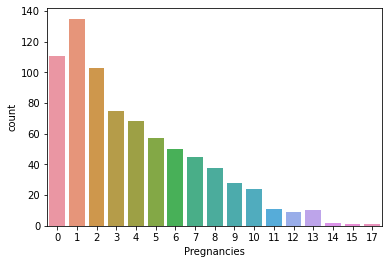

In [43]:
sns.countplot(data =df, x = "Pregnancies")

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

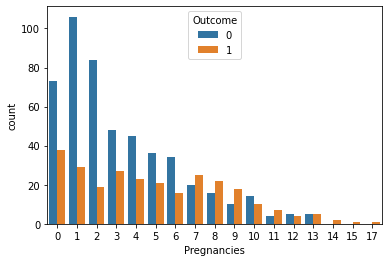

In [44]:
sns.countplot(data = df, x = 'Pregnancies', hue = 'Outcome')

In [45]:
df['Pregnancies_high'] = df['Pregnancies']>6
df[['Pregnancies','Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

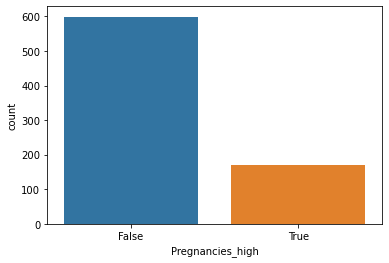

In [47]:
sns.countplot(data = df, x= 'Pregnancies_high')

<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

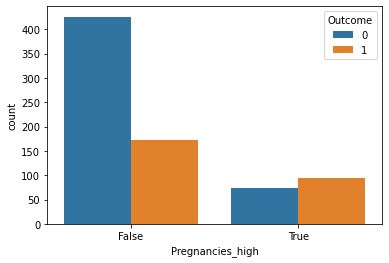

In [49]:
#pregnancies_high와 outcome의 관계를 시각화
sns.countplot(data = df, x='Pregnancies_high',hue = 'Outcome')

### barplot

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

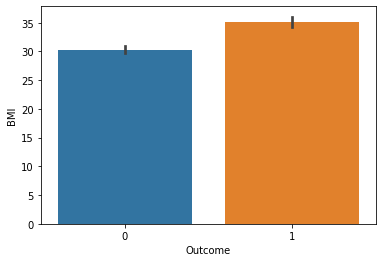

In [51]:
sns.barplot(data = df,x='Outcome', y= 'BMI')

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

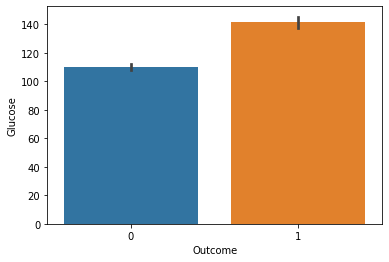

In [54]:
sns.barplot(data =df,x='Outcome',y='Glucose')

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

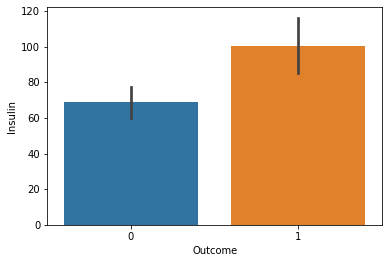

In [55]:
sns.barplot(data =df, x='Outcome',y='Insulin')
#검정색 막대기는 신뢰구간 값의 범위

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

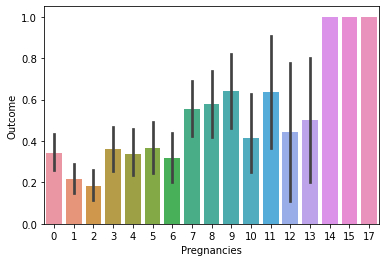

In [56]:
sns.barplot(data =df,x ='Pregnancies',y='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>

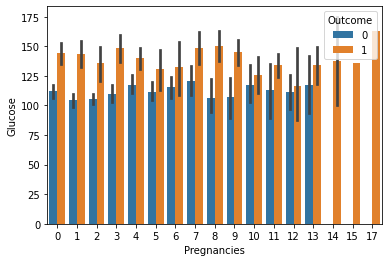

In [59]:
sns.barplot(data=df, x='Pregnancies',y='Glucose',hue = 'Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

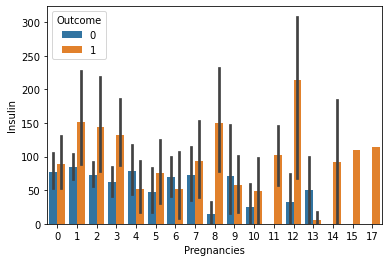

In [60]:
sns.barplot(data= df,x='Pregnancies',y='Insulin',hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

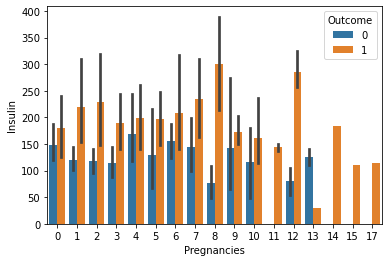

In [62]:
#신뢰구간의 범위를 줄이기위해
#insulin이 0인경우를 제외한다.
sns.barplot(data = df[df['Insulin']>0], x= 'Pregnancies', y= 'Insulin',hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

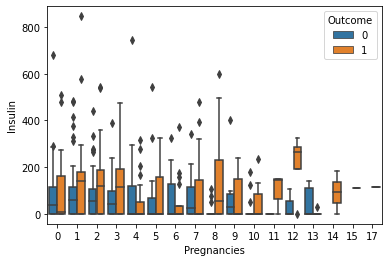

In [63]:
sns.boxplot(data= df, x='Pregnancies', y='Insulin', hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

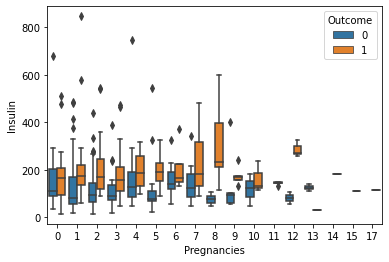

In [64]:
#인슐린의 값이 0이 많아 데이터가 주저않아있는것 처럼 보인다.
sns.boxplot(data =df[df['Insulin']>0], x = 'Pregnancies',y='Insulin', hue = 'Outcome')

### violinplot : boxplot을 좀 더 자세하게 표현


<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

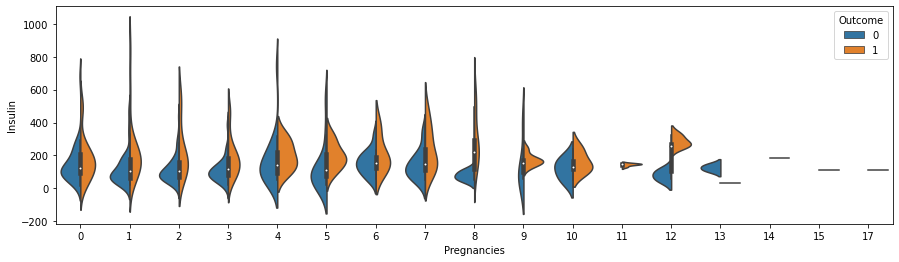

In [66]:
plt.figure(figsize =(15,4))
sns.violinplot(data=df[df["Insulin"]>0], x = 'Pregnancies',y= "Insulin",hue='Outcome',split="True")
#두 파트로 좌우로 나누어 보기 위해 split옵션 사용

### swarmplot 점으로 표현

C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

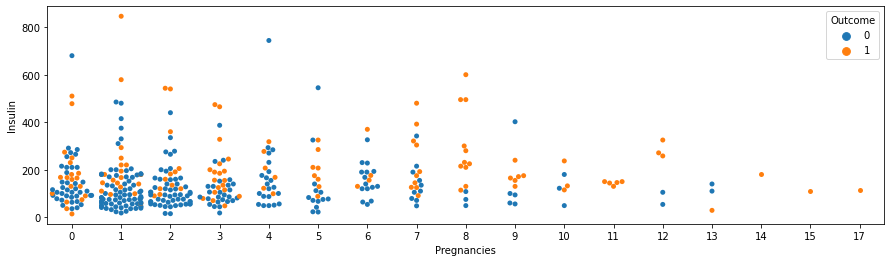

In [67]:
plt.figure(figsize=(15,4))
sns.swarmplot(data =df[df["Insulin"]>0],x= 'Pregnancies',y='Insulin',hue='Outcome')

### distplot

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

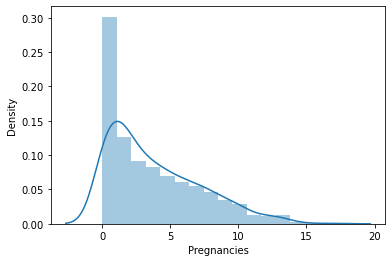

In [68]:
sns.distplot(df["Pregnancies"])

In [72]:
df_0 = df[df["Outcome"]==0]
df_1 = df[df["Outcome"]==1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

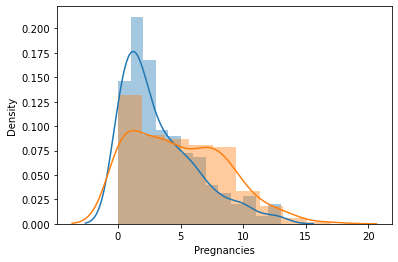

In [75]:
sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])
#그래프를 보면 임신한 횟수가 5번을 넘기면 당뇨병의 발병률이 높아진다.

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

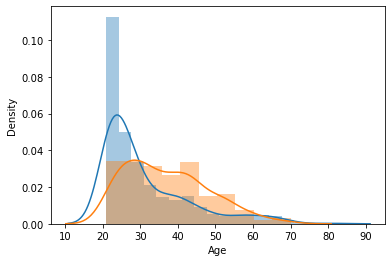

In [76]:
#나이관련 발병률
sns.distplot(df_0["Age"])
sns.distplot(df_1["Age"])
#30살을 넘겼을 때 발병률이 높다.

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

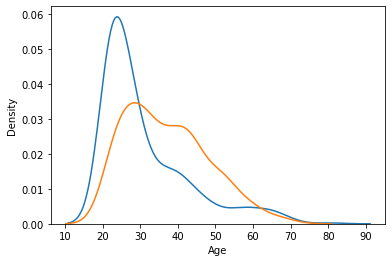

In [78]:
# 막대그래프 제거
sns.distplot(df_0["Age"],hist = False)
sns.distplot(df_1["Age"],hist =False)

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarnin

<AxesSubplot:xlabel='Age', ylabel='Density'>

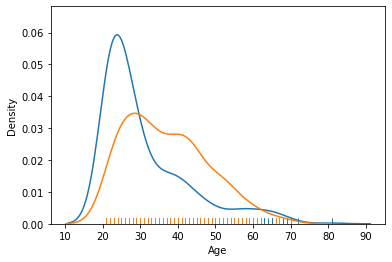

In [79]:
# rug생성
sns.distplot(df_0["Age"],hist =False, rug =True)
sns.distplot(df_1["Age"],hist= False, rug=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

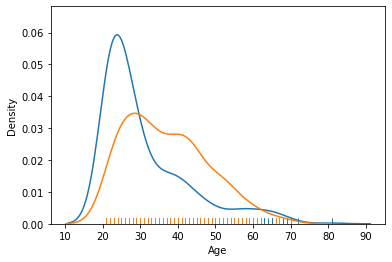

In [82]:
#각 그래프에 label을 달아준다.
import warnings
warnings.simplefilter(action="ignore",category =FutureWarning)

#헷갈리지 않게 라벨을 만들어줌.
sns.distplot(df_0["Age"],hist =False, rug =True, label=0)
sns.distplot(df_1["Age"],hist=False, rug=True, label=1)

### subplot : columns을 시각화 할때 사용

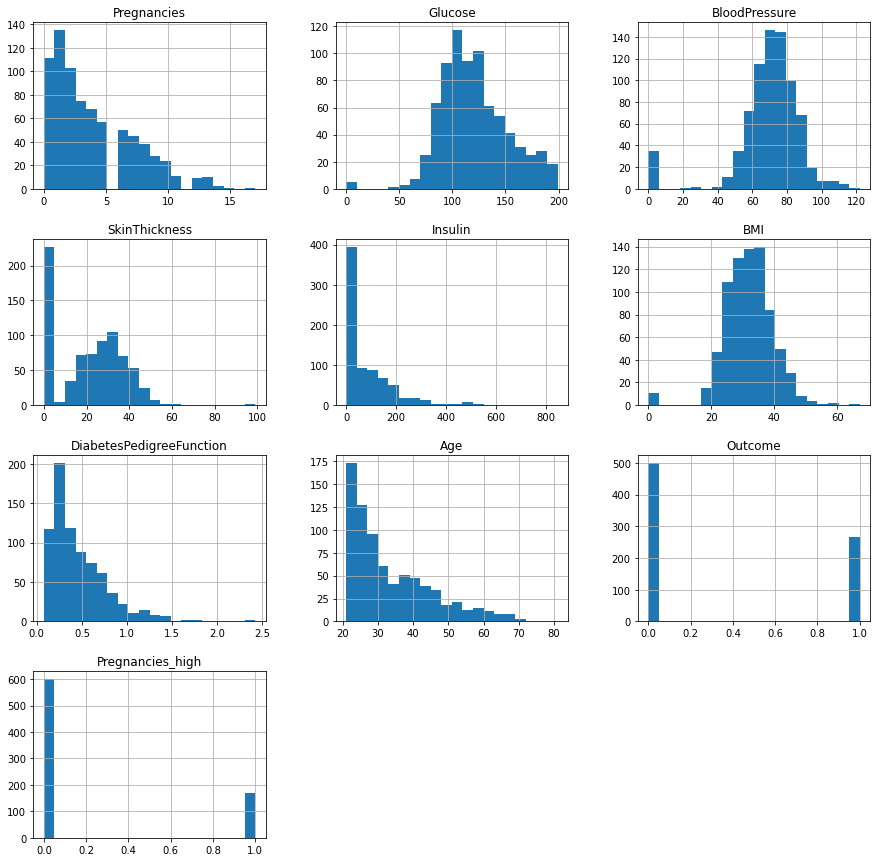

In [83]:
#hist는 boolean 타입을 지원하지 않기때문에 int로 바꿔준다.
#figsize는 사이즈 변경, bins는 막대의 갯수
df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)
h = df.hist(figsize=(15,15),bins= 20)

In [85]:
col_num = df.columns.shape
col_num

(10,)

In [96]:
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

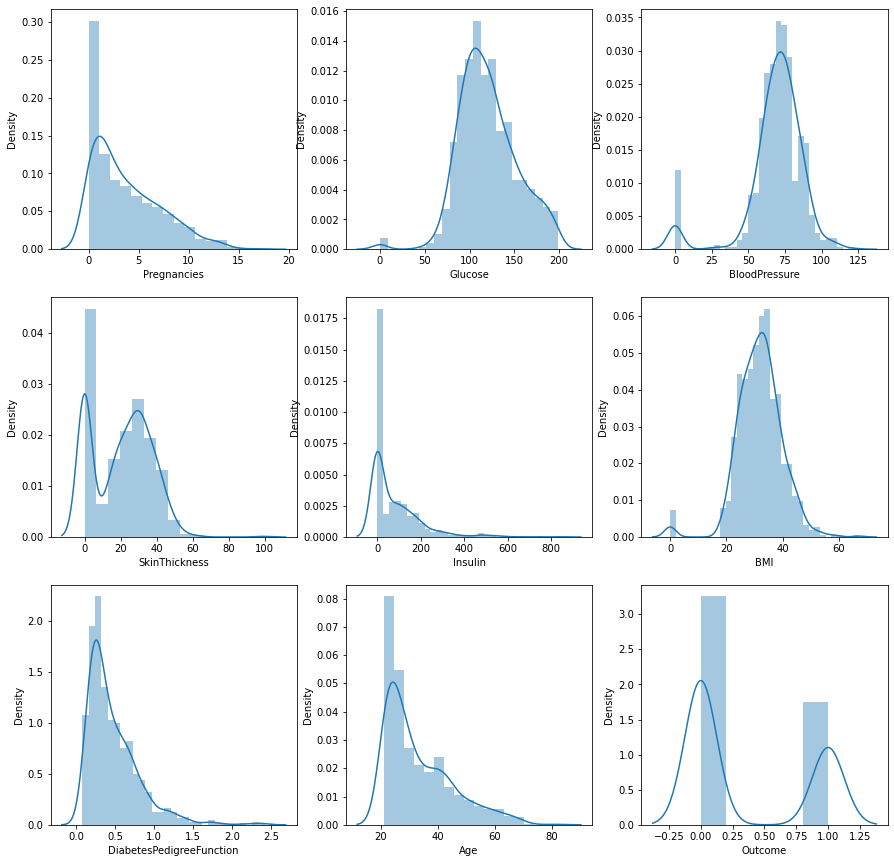

In [98]:
#서브플롯을 그린다.
fig, axes = plt.subplots(nrows = 3, ncols =3, figsize=(15,15))

#sns.distplot(df['Outcome'],ax=axes[0][0])
#반복문을 이용해 subplots그리기
for i,col_name in enumerate(cols) :
    row = i//3
    col = i%3
    sns.distplot(df[col_name],ax=axes[row][col])
#히스토그램은 빈도수를 y축 값으로 표현한다.


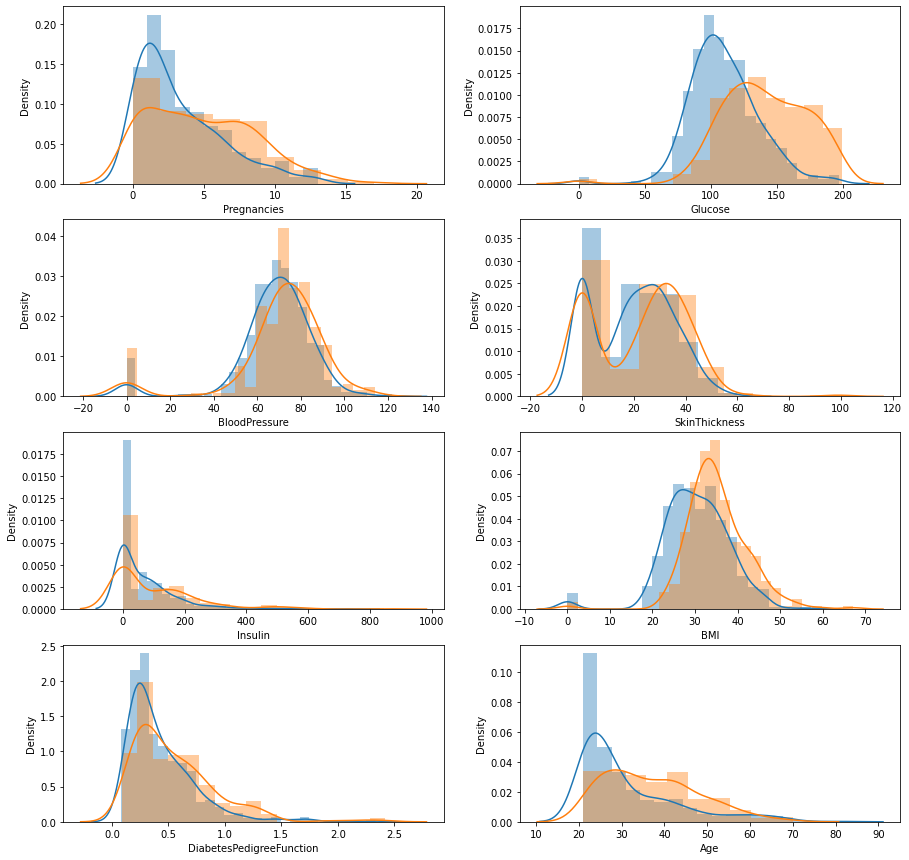

In [99]:
#서브플롯을 그린다.
fig, axes = plt.subplots(nrows = 4, ncols =2, figsize=(15,15))

for i,col_name in enumerate(cols[:-1]) :
    row = i//2
    col = i%2
    sns.distplot(df_0[col_name],ax=axes[row][col])
    sns.distplot(df_1[col_name],ax=axes[row][col])
#히스토그램은 빈도수를 y축 값으로 표현한다.


### Violinplot으로 subplot을 그리자



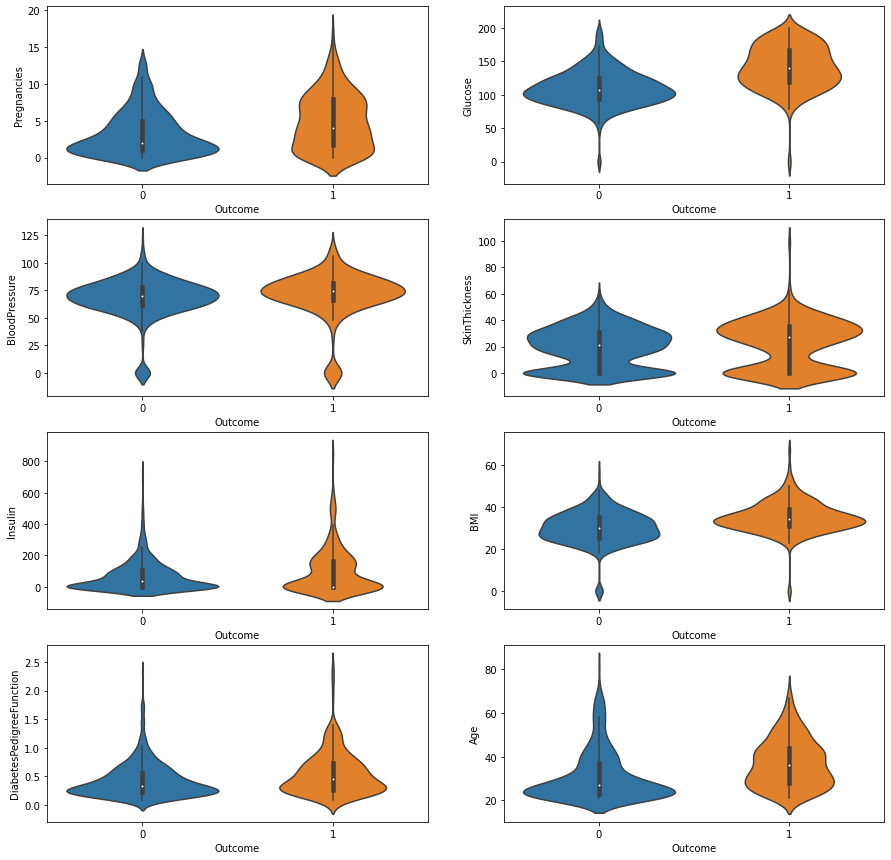

In [103]:
fig,axes = plt.subplots(nrows =4 ,ncols =2, figsize =(15,15))

for i, col_name in enumerate(cols[:-1]):
    row = i//2
    col = i%2
    sns.violinplot(data=df,x="Outcome",y=col_name,ax=axes[row][col])

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

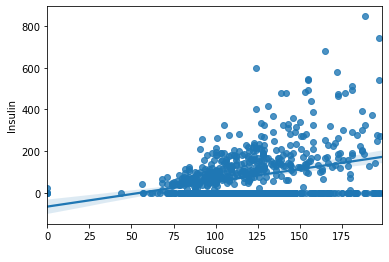

In [104]:
# 포도당 수치와 인슐린은 당뇨병과 관련있을 것이라 가정
sns.regplot(data= df,x="Glucose",y="Insulin")

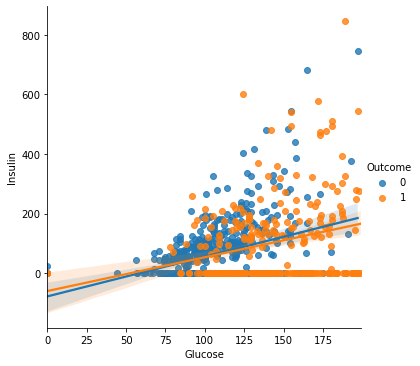

In [106]:
sns.lmplot(data =df,x="Glucose",y="Insulin",hue="Outcome")

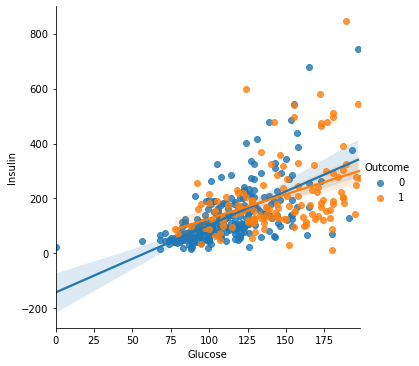

In [109]:
#insulin이 0이상인 값만 이용
sns.lmplot(data =df[df["Insulin"]>0],x="Glucose",y="Insulin",hue="Outcome")

### Pairplot : 모든 수치에 대한 plot을 그린다.

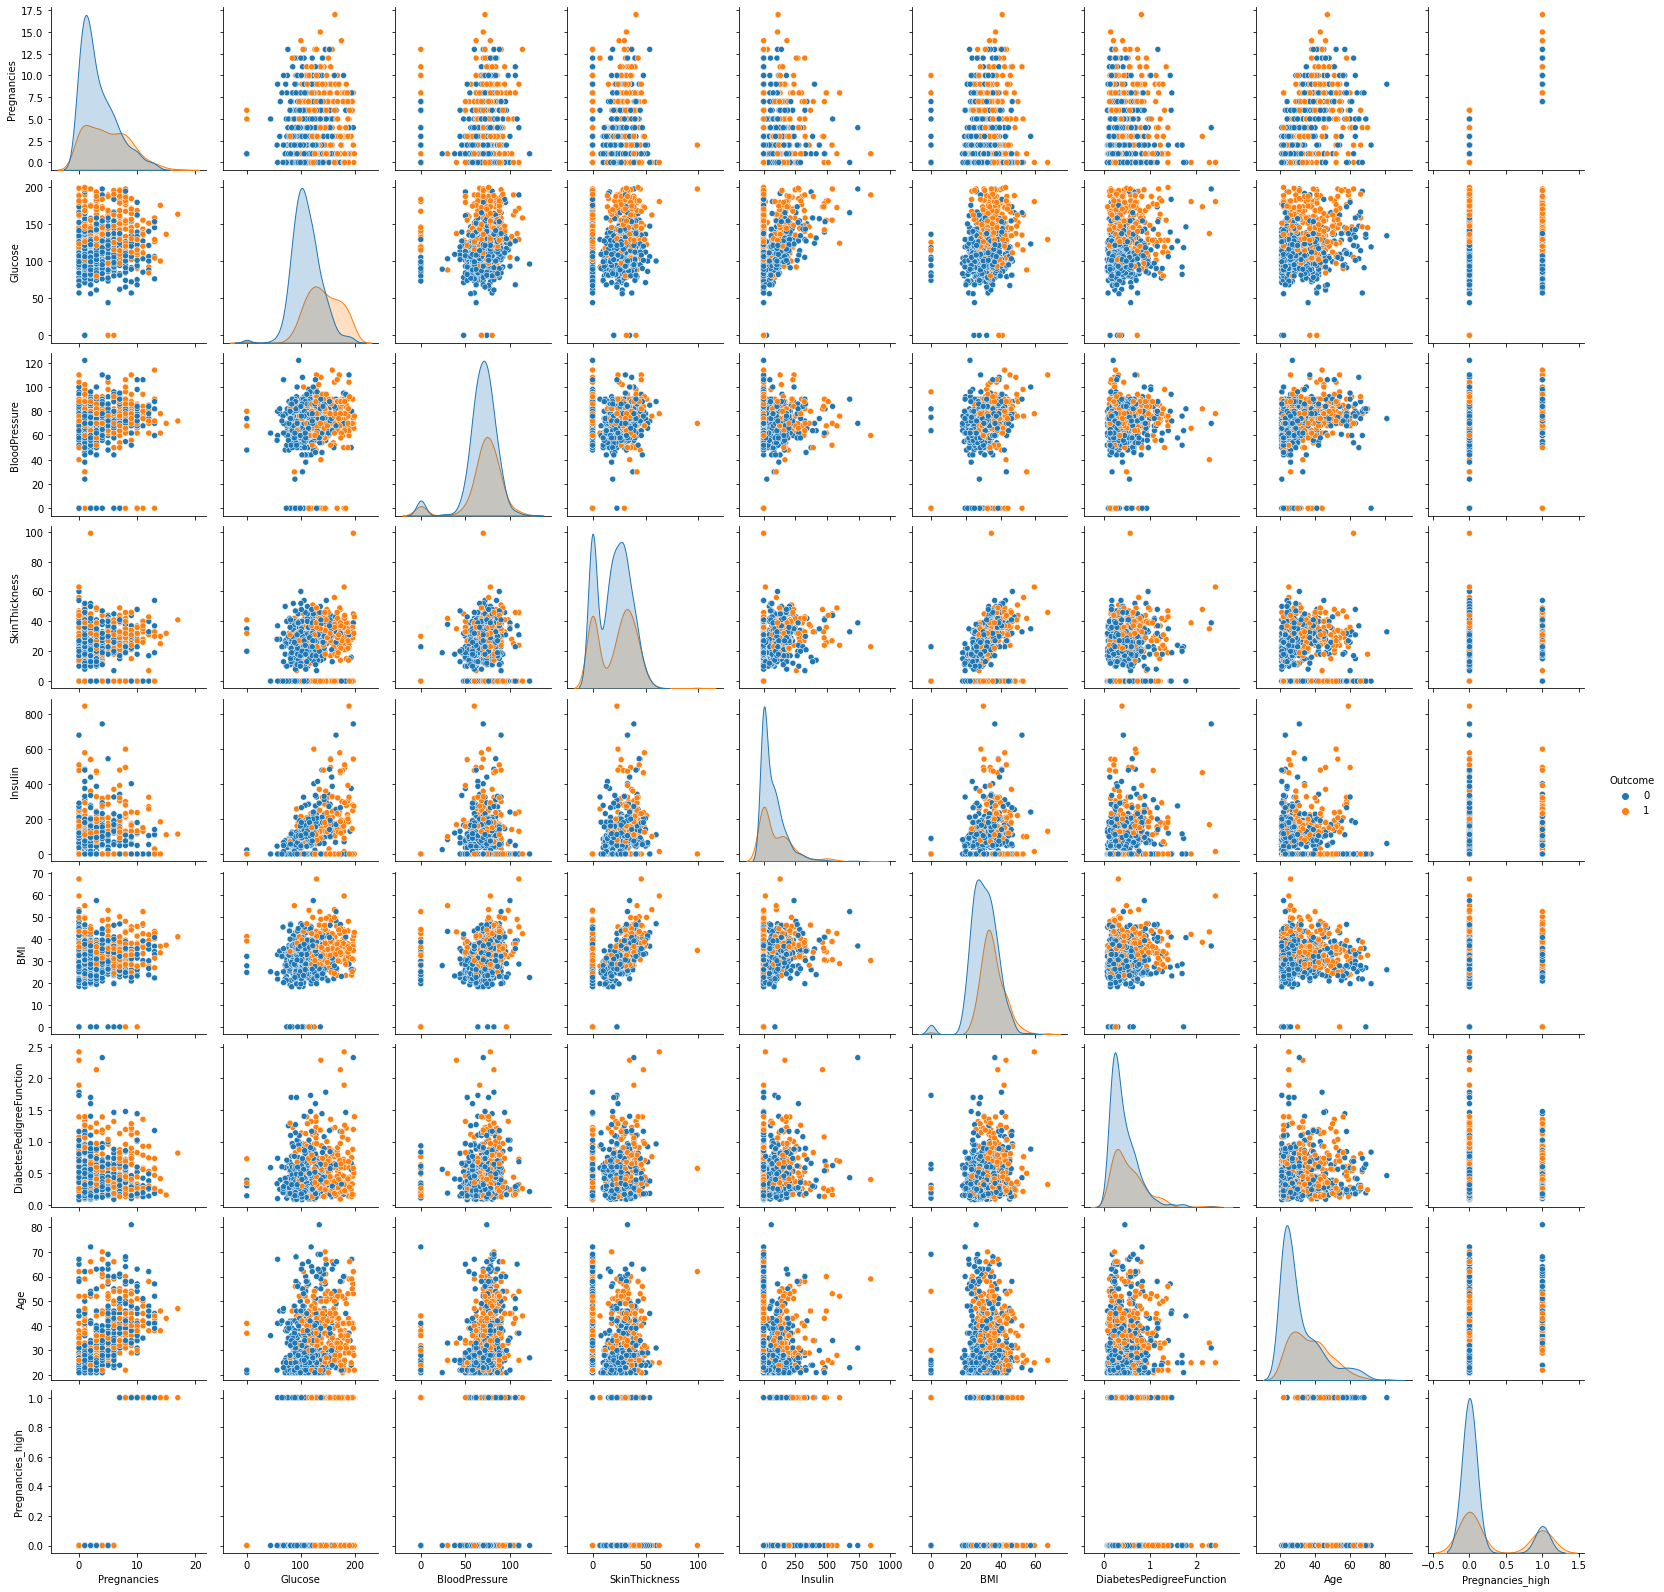

In [114]:
sns.pairplot(df,hue="Outcome")

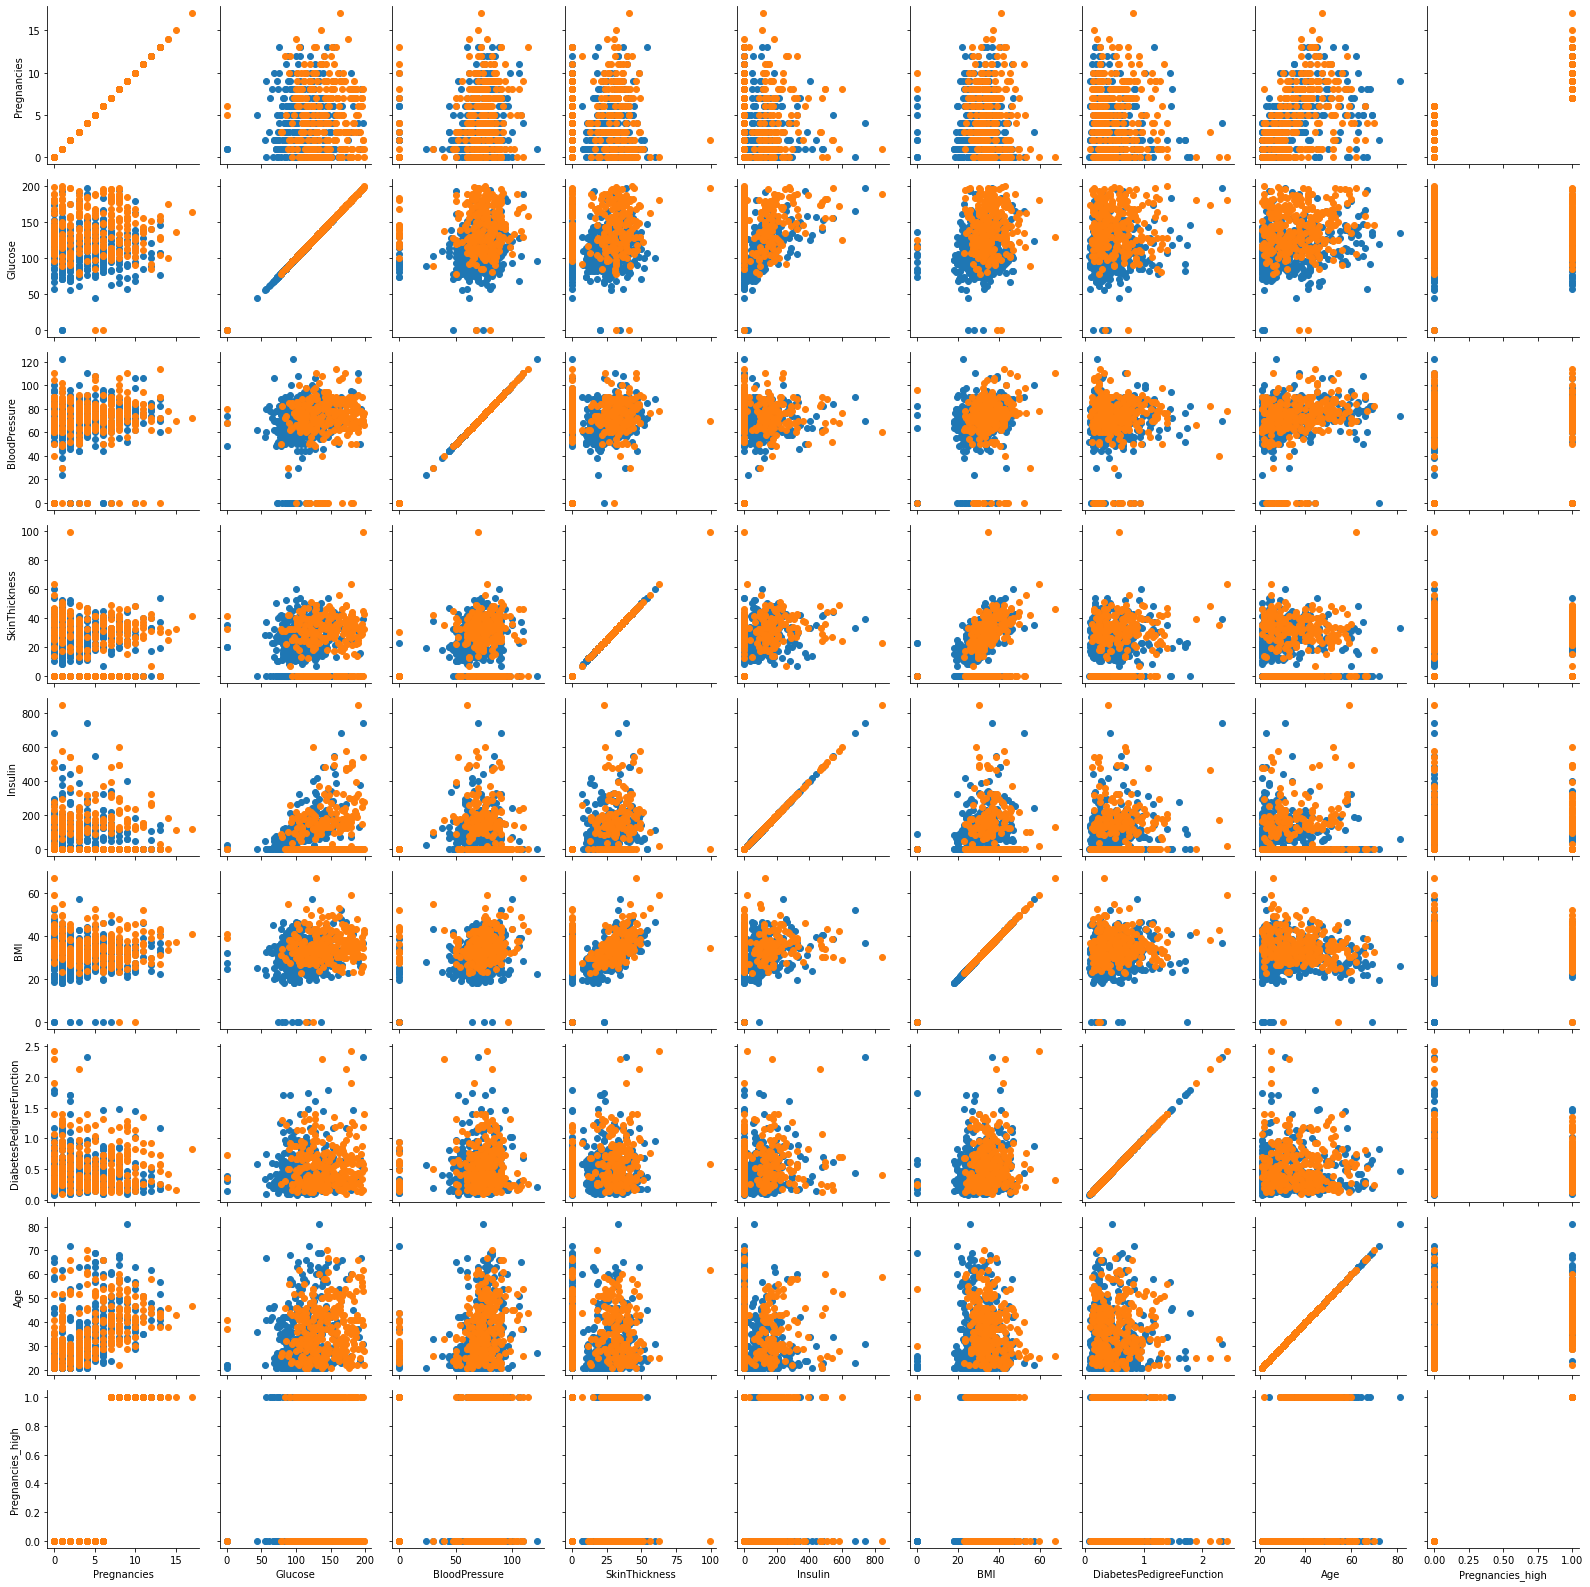

In [113]:
g = sns.PairGrid(df,hue="Outcome")
g.map(plt.scatter)

### 상관 계수 분석하기

In [115]:
df_corr =df.corr()
df_corr.style.background_gradient()
#밑의 표는 특성끼리의 상관계수를 나타낸다.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Pregnancies_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


<AxesSubplot:>

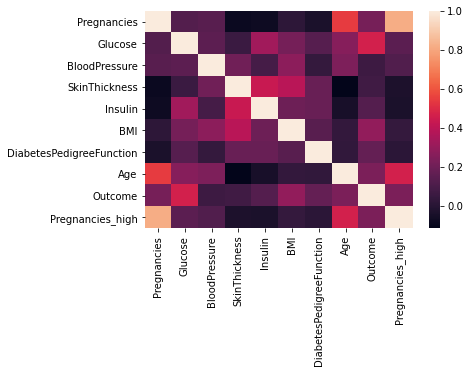

In [116]:
sns.heatmap(df_corr)

<AxesSubplot:>

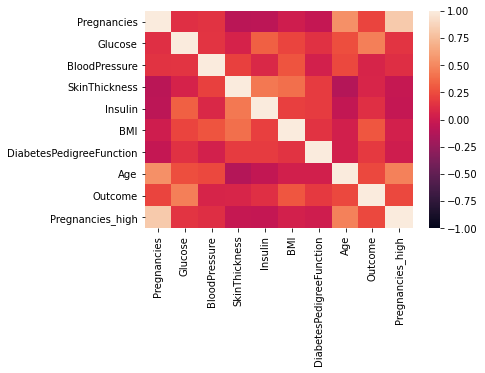

In [117]:
sns.heatmap(df_corr, vmax =1, vmin=-1)

<AxesSubplot:>

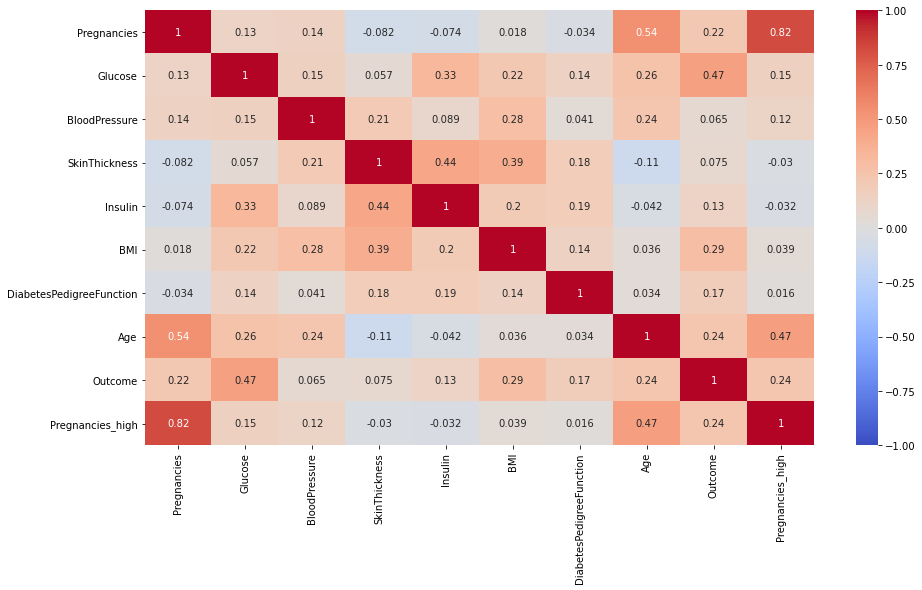

In [121]:
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, annot =True, vmax =1, vmin =-1, cmap="coolwarm")

In [123]:
#age까지의 열을 가져온다.
df.iloc[:,:-2].replace(0,np.nan)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47


In [126]:
#df_matrix에 df["Outcome"]의 값을 넣어준다.
df_matrix = df.iloc[:,:-2].replace(0,np.nan)
df_matrix["Outcome"]=df["Outcome"]
df_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [127]:
#outcome과 각 열의 상관관계
df_corr["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Pregnancies_high            0.237557
Name: Outcome, dtype: float64

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

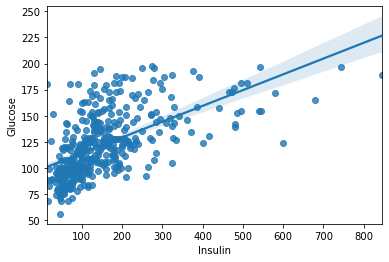

In [129]:
sns.regplot(data=df_matrix, x="Insulin",y="Glucose")

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

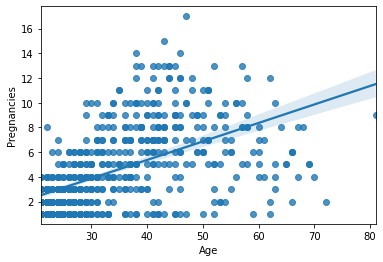

In [131]:
#연령과 임신횟수의 상관관계
sns.regplot(data =df_matrix, x="Age",y="Pregnancies")

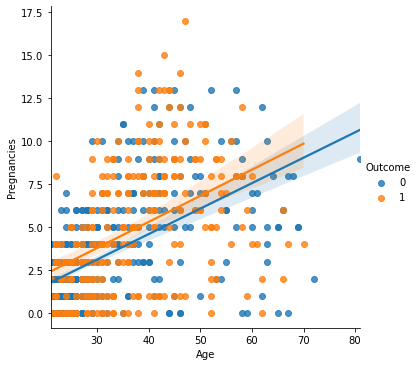

In [133]:
#regplot은 hue를 지원하지 않는다.
sns.lmplot(data= df, x="Age",y="Pregnancies",hue="Outcome")

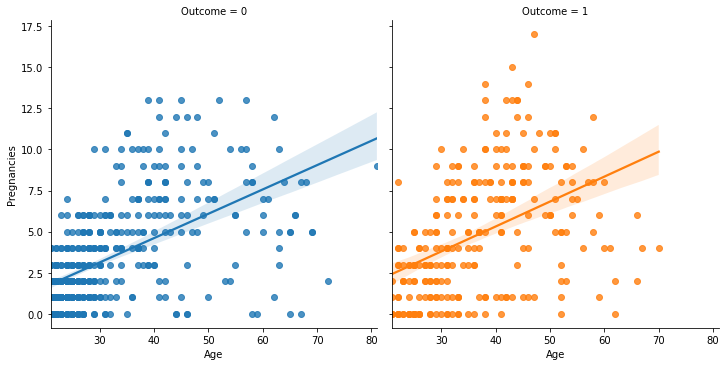

In [134]:
#서브 plot을 그리기 위해
sns.lmplot(data= df, x="Age",y="Pregnancies",hue="Outcome",col="Outcome")